This is a notebook where it was tried out to segment the proteins through easy filters

# Imports

In [1]:
import numpy as np
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import measure
from skimage.segmentation import random_walker
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2 as cv
from skimage import io

In [2]:
# Generate an initial image with two overlapping circles
im = io.imread(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page0_R.tif")

<Figure size 432x288 with 0 Axes>

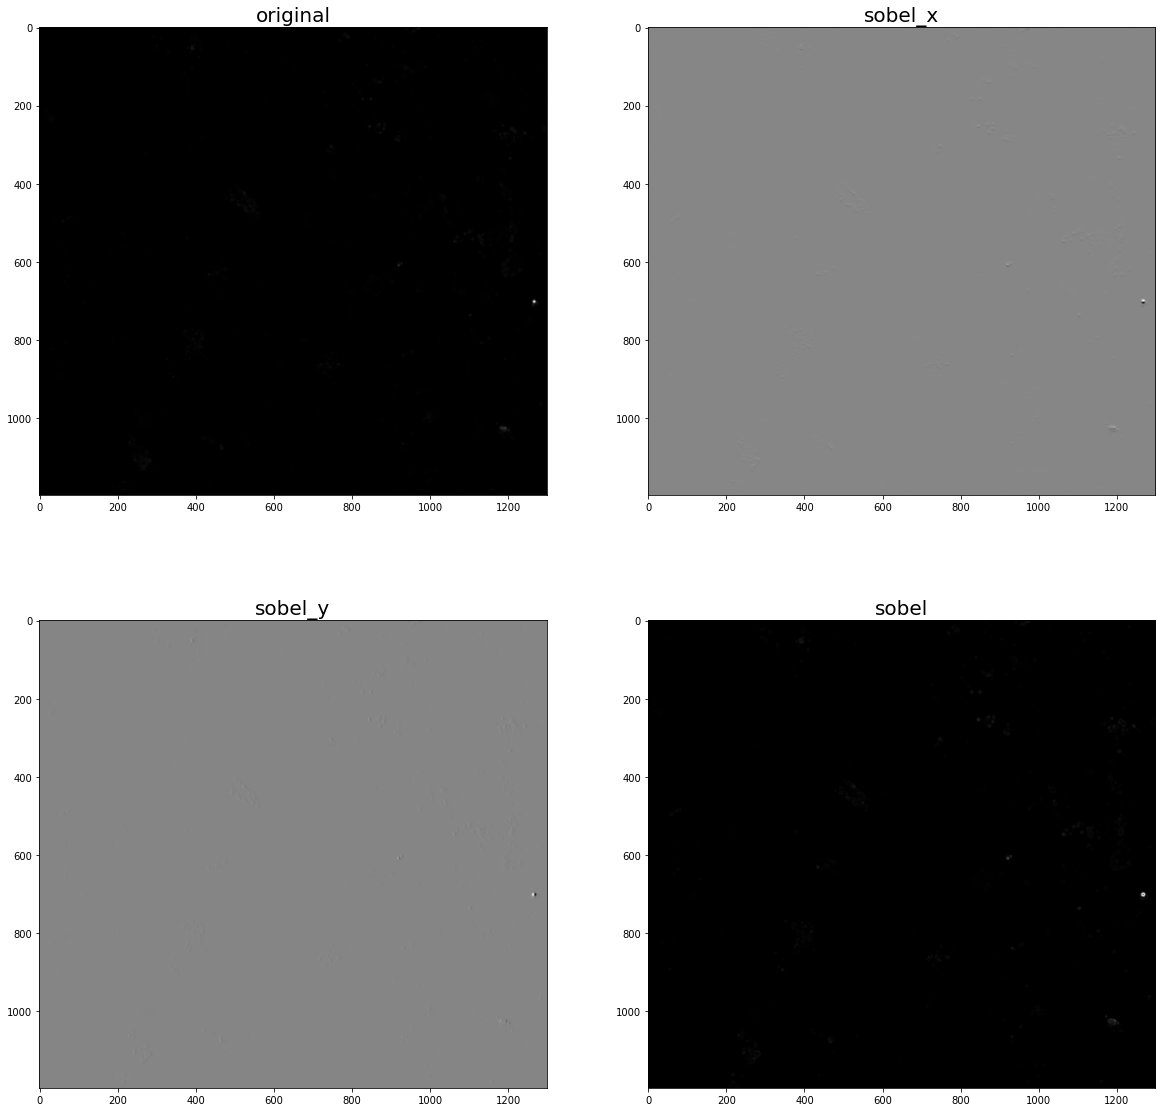

In [3]:
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import filters
#im = rgb2gray(imread('../images/cameraman.jpg')) # RGB image to gray scale
plt.gray()
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(im)
plt.title('original', size=20)
plt.subplot(222)
edges_y = filters.sobel_h(im)
plt.imshow(edges_y)
plt.title('sobel_x', size=20)
plt.subplot(223)
edges_x = filters.sobel_v(im)
plt.imshow(edges_x)
plt.title('sobel_y', size=20)
plt.subplot(224)
edges = filters.sobel(im)
plt.imshow(edges)
plt.title('sobel', size=20)
plt.show()

(1197, 1299)


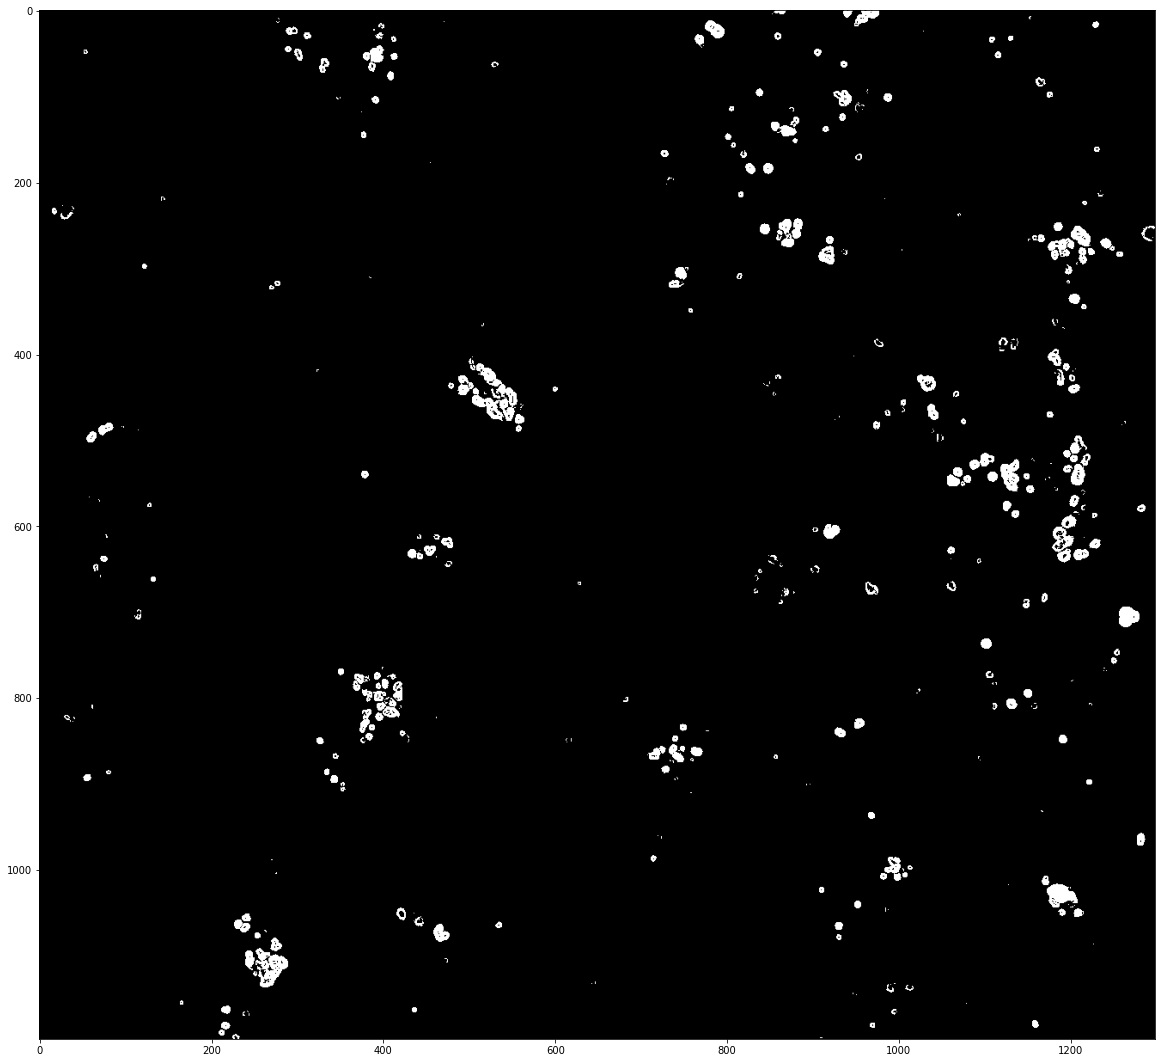

In [32]:
print(edges.shape)
edges_masked = (edges > 0.0005).astype(int)
image_masked = (im > 100).astype(int)
plt.figure(figsize=(20,20))
plt.imshow(edges_masked)


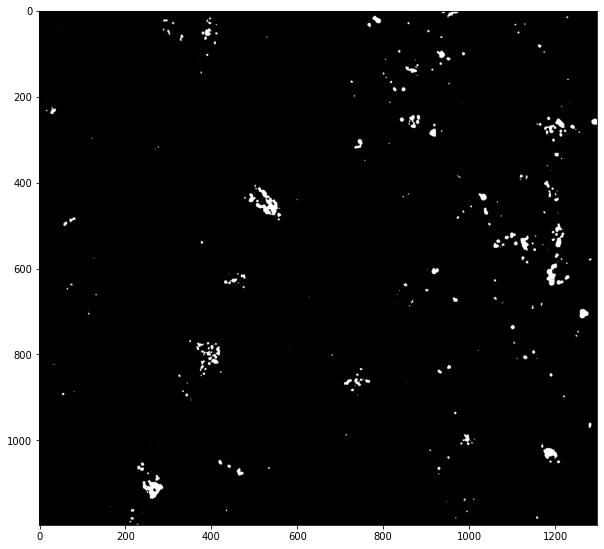

In [40]:
image_masked = (im > 200).astype(int)
plt.figure(figsize=(10,10))
plt.imshow(image_masked)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 1299 BarContainer objects>)

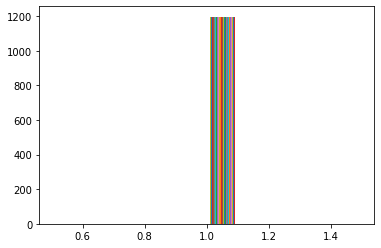

In [31]:
plt.hist(image_masked)

In [41]:
# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.
markers = np.zeros(im.shape, dtype=np.uint)
markers[im < 200] = 1
markers[im > 200] = 2

from skimage.segmentation import random_walker
# Run random walker algorithm
labels = random_walker(im, markers, beta=10, mode='bf')

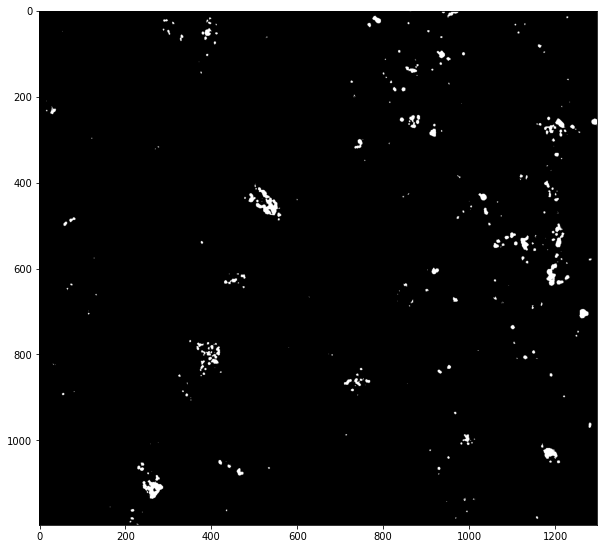

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(labels)

In [3]:
# Generate an initial image with two overlapping circles
image = io.imread(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page0.tif")

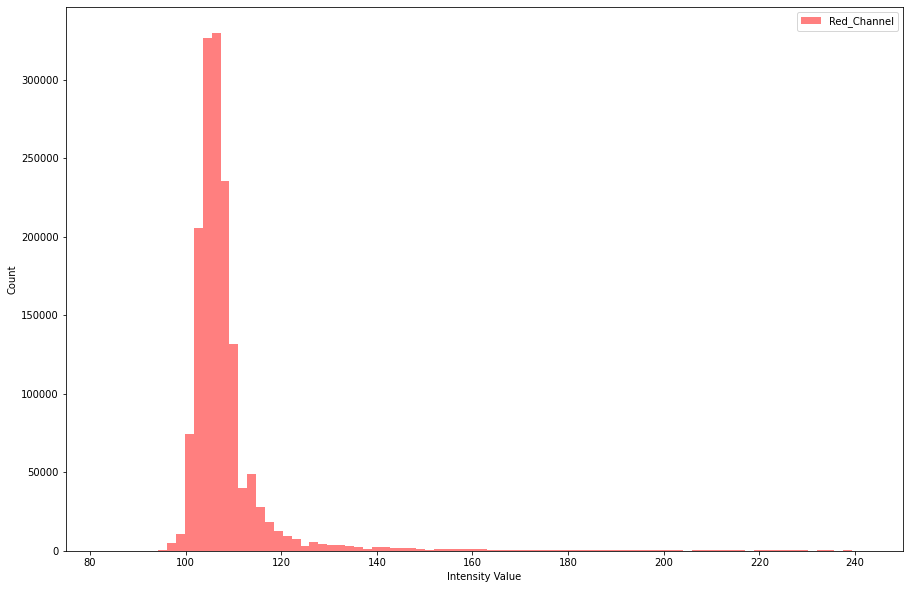

In [15]:
from skimage import io
import matplotlib.pyplot as plt
#_ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
plt.figure(figsize=(15,10))
_ = plt.hist(image[:, :, 0].ravel(), bins = 5000,  color = 'red', alpha = 0.5)
#_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
#_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel'])
_ = plt.xlim(75, 250)
plt.show()

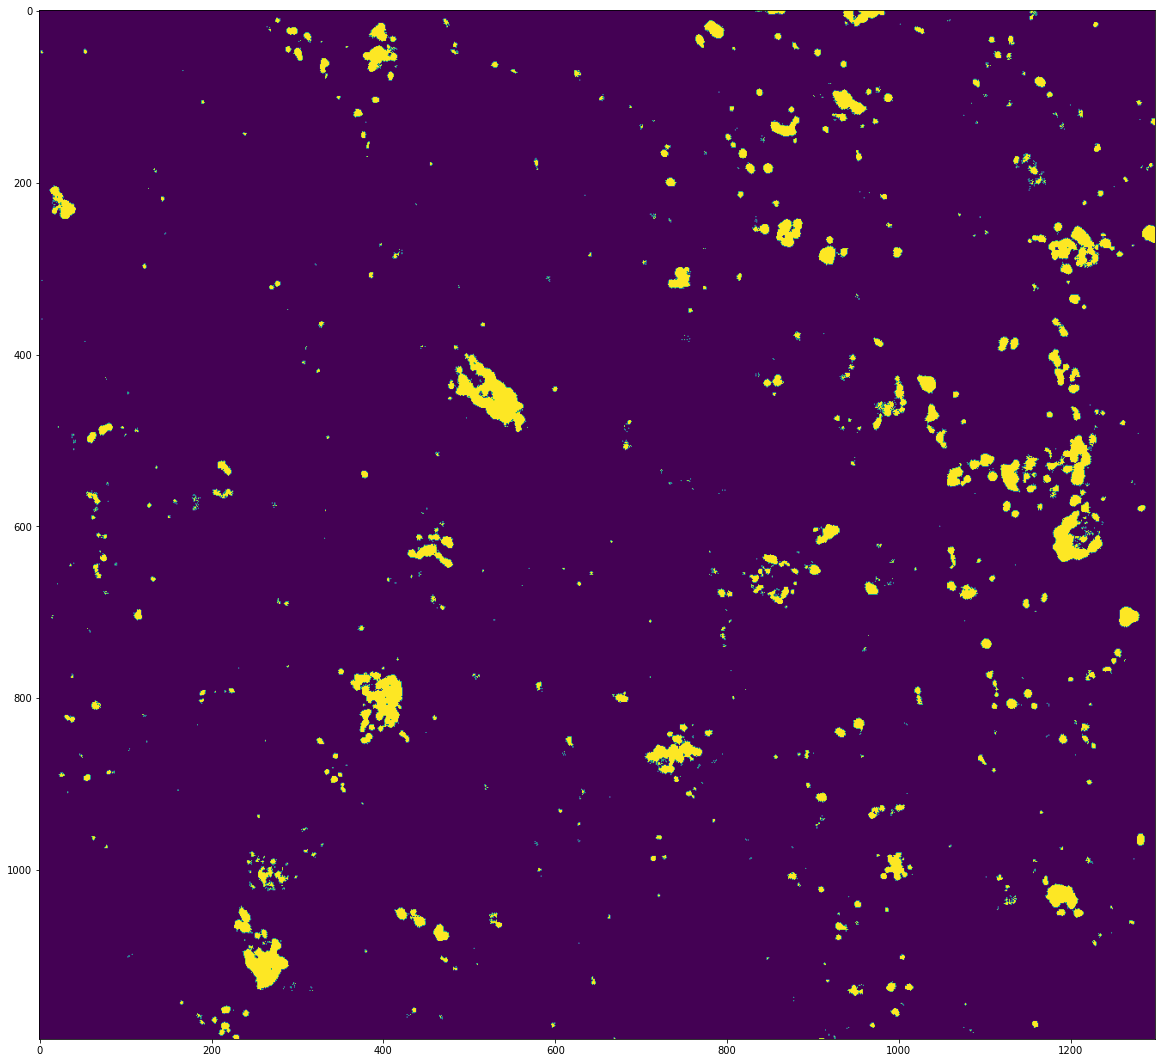

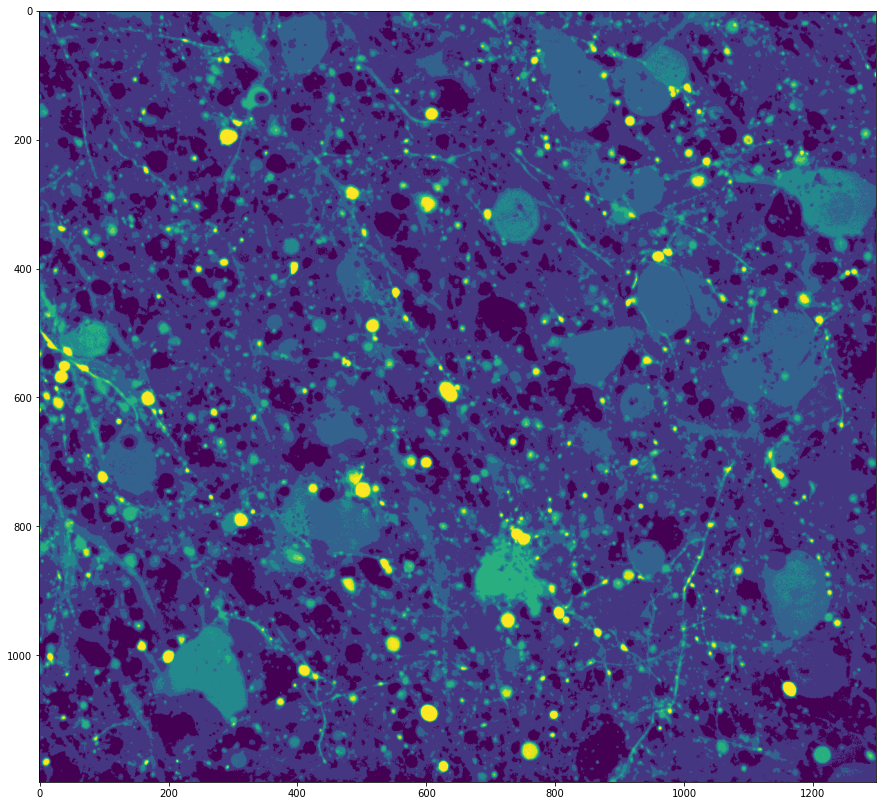

In [50]:
from PIL import Image, ImageEnhance
# Opening Image
im = np.asarray(Image.open(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page0.tif"))
image = Image.fromarray((im * 1).astype(np.uint8)).convert('RGB')
converter = ImageEnhance.Color(image)
img2 = converter.enhance(40.0)
plt.figure(figsize=(15,15))
plt.imshow(img2.getchannel('B'))
#display(img2.getchannel('R'))

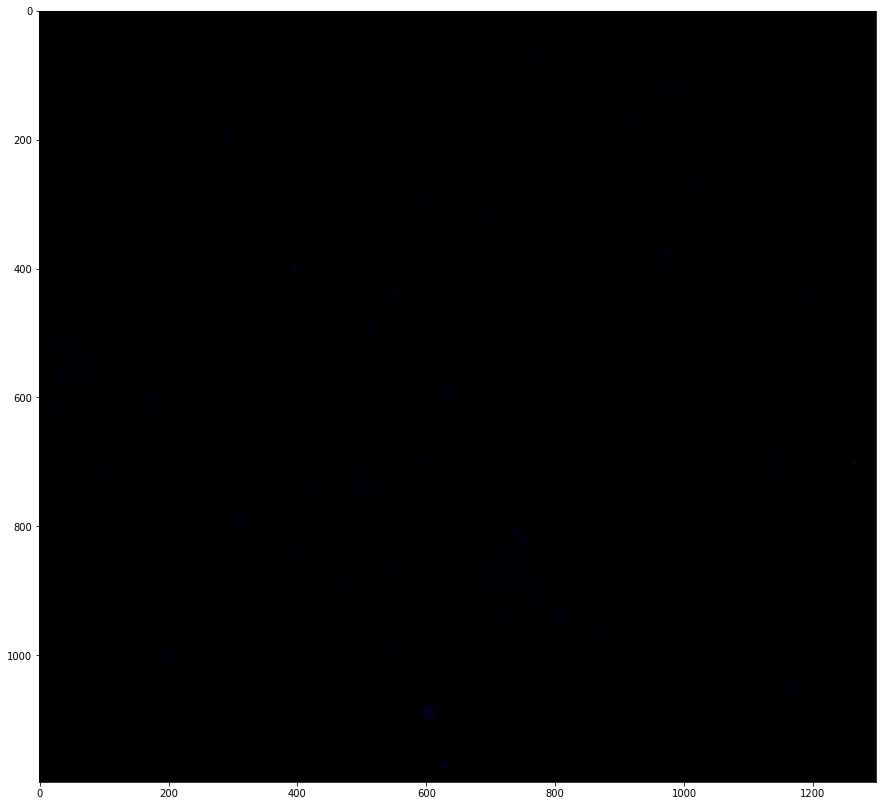

In [37]:
plt.figure(figsize=(15,15))
plt.imshow(image)